In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import load_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score



In [ ]:
df = pd.read_csv("Train_.csv")

In [ ]:
df.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


# **Data Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81403 entries, 0 to 81402
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   81403 non-null  int64  
 1   target                               81403 non-null  float64
 2   comment_text                         81403 non-null  object 
 3   severe_toxicity                      81403 non-null  float64
 4   obscene                              81403 non-null  float64
 5   identity_attack                      81403 non-null  float64
 6   insult                               81403 non-null  float64
 7   threat                               81403 non-null  float64
 8   asian                                15794 non-null  float64
 9   atheist                              15794 non-null  float64
 10  bisexual                             15794 non-null  float64
 11  black                       

In [ ]:
df.describe()

,id,target,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,parent_id,article_id,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
count,81403.000000,81403.000000,81403.000000,81403.000000,81403.000000,81403.000000,81403.000000,15794.000000,15794.000000,15794.000000,...,43228.000000,81403.000000,81403.000000,81403.000000,81403.000000,81403.000000,81403.000000,81403.000000,81403.000000,81403.000000
mean,291773.232362,0.088316,0.004189,0.014962,0.014727,0.068730,0.009696,0.005734,0.003002,0.003482,...,291456.211021,86566.532855,0.000700,0.000258,0.000123,2.329202,0.000639,0.006318,1.526258,8.387541
std,29075.709523,0.185654,0.022333,0.071572,0.062295,0.163326,0.052198,0.060200,0.048684,0.039820,...,28893.264820,30974.592830,0.031924,0.018210,0.012141,4.006693,0.025748,0.044123,29.095411,44.798869
min,59848.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,61006.000000,2006.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,267076.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,266892.250000,57953.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,291357.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,290674.000000,97313.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000
75%,316846.000000,0.140175,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,316265.500000,103088.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,6.000000
max,342151.000000,1.000000,0.534819,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,342123.000000,138276.000000,4.000000,2.000000,2.000000,84.000000,2.000000,1.000000,1848.000000,3509.000000


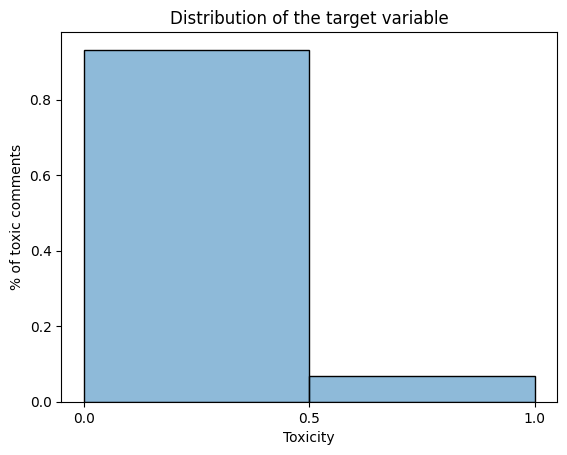

In [ ]:
sns.histplot(data=df, x='target', binwidth=0.5, alpha=0.5, stat='probability')
plt.title("Distribution of the target variable")
plt.xlabel('Toxicity')
plt.ylabel('% of toxic comments')

plt.xticks(np.arange(0, 1.1, 0.5))
plt.show()

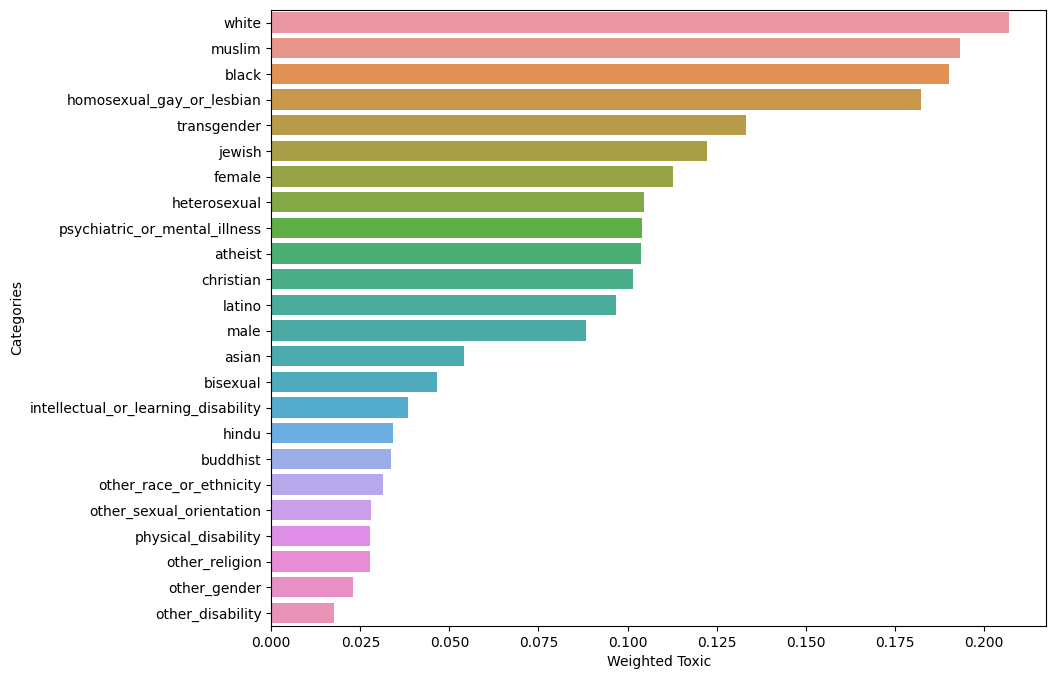

In [ ]:
gender = ['male', 'female', 'transgender', 'other_gender']
sex = ['heterosexual', 'homosexual_gay_or_lesbian', 'bisexual', 'other_sexual_orientation']
religion = ['christian', 'jewish', 'muslim', 'hindu', 'buddhist', 'atheist', 'other_religion']
race = ['black', 'white', 'asian', 'latino', 'other_race_or_ethnicity']
disability = ['physical_disability','intellectual_or_learning_disability','psychiatric_or_mental_illness','other_disability']

identity_variables = gender + sex + religion + race + disability

demographics = df[['target'] + identity_variables].dropna()

weighted_toxic = demographics.iloc[:, 1:].multiply(demographics.iloc[:, 0], axis=0).sum()/demographics.iloc[:, 1:][demographics.iloc[:, 1:]>0].count()
weighted_toxic = weighted_toxic.sort_values(ascending=False)

plt.figure(figsize=(10,8))

ax = sns.barplot(x = weighted_toxic.values, y = weighted_toxic.index)
plt.ylabel('Categories')
plt.xlabel('Weighted Toxic')
plt.show()

In [ ]:
y = np.where(df['target'] >= 0.5, 1, 0)

## **PreProcessing**

In [ ]:
import string
import re

def comment_clean(cmnt):
    cmnt = str(cmnt).lower()

    cmnt = re.sub(r'https?:\/\/\S+', '', cmnt)
    # Remove @mentions
    cmnt = re.sub(r'@[A-Za-z0-9]+', '', cmnt)
    # Remove numbers
    cmnt = re.sub(r'[0-9]+', '', cmnt)

    # Remove punctuations
    cmnt = ''.join(char for char in cmnt if char not in string.punctuation)
    # Strip leading/trailing whitespace
    cleaned = cmnt.strip()

    return cleaned

df["comment_text"] = df["comment_text"].apply(comment_clean)
df["comment_text"].head(5)


0    this is so cool its like would you want your m...
1    thank you this would make my life a lot less a...
2    this is such an urgent design problem kudos to...
3    is this something ill be able to install on my...
4                  haha you guys are a bunch of losers
Name: comment_text, dtype: object

In [ ]:
import string
import re
import spacy

nlp = spacy.load("en_core_web_sm")

def pre_preprocessing(cmnt, nlp=nlp):

    stop_words = nlp.Defaults.stop_words
    rm_stop_words_lemma = []

    doc = nlp(cmnt)
    for token in doc:
        if token.text not in stop_words and token.pos_ != "PUNCT":
            lemma_word = token.lemma_
            rm_stop_words_lemma.append(lemma_word)

    processed = " ".join(rm_stop_words_lemma)
    return processed


df["comment_text"] = df["comment_text"].apply(pre_preprocessing)
df["comment_text"].head(5)

0         cool like want mother read great idea
1      thank life lot anxietyinduce not let way
2    urgent design problem kudo take impressive
3                 ill able install site release
4                          haha guy bunch loser
Name: comment_text, dtype: object

In [ ]:
df.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,cool like want mother read great idea,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,thank life lot anxietyinduce not let way,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,urgent design problem kudo take impressive,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,ill able install site release,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha guy bunch loser,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


# **Vectorization**

In [ ]:
Tfidf_Vectorizer = TfidfVectorizer()
X = Tfidf_Vectorizer.fit_transform(df["comment_text"])
X.shape, y.shape

((81403, 63485), (81403,))

## **Logistic Regression**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
LR = LogisticRegression(C=5, random_state=42, max_iter=100)
LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=5, random_state=42)

In [ ]:
cv_accuracy = cross_val_score(LR, X, y, cv=5, scoring='roc_auc')
print(cv_accuracy)
print(cv_accuracy.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.90964253 0.91015082 0.91385632 0.90252413 0.91220311]
0.9096753801099109


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred = LR.predict(X_test)

[[22630   144]
 [ 1048   599]]


Text(104.7222222222223, 0.5, 'true value')

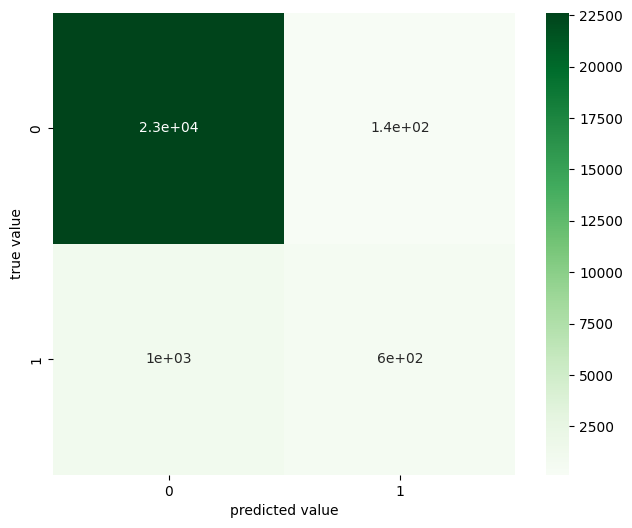

In [ ]:
plt.figure(figsize=(8, 6))
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

sns.heatmap(confusion_matrix, square=True, annot=True, cmap='Greens')
plt.xlabel('predicted value')
plt.ylabel('true value')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     22774
           1       0.81      0.36      0.50      1647

    accuracy                           0.95     24421
   macro avg       0.88      0.68      0.74     24421
weighted avg       0.95      0.95      0.94     24421



0.21075710773905554
0.706644355231808


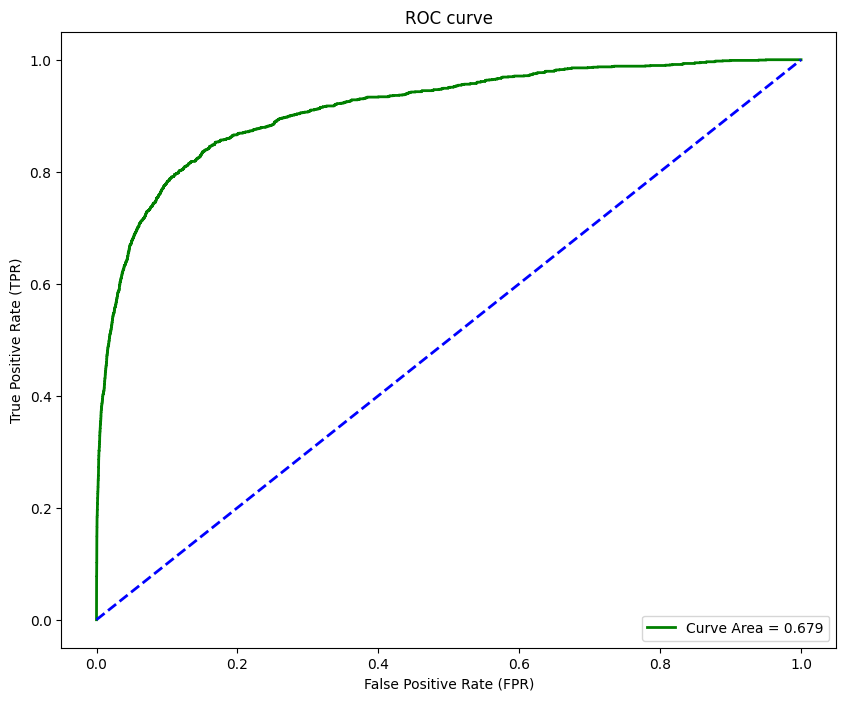

In [ ]:
fpr, tpr, thr = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
print(fpr.mean())
print(tpr.mean())
#auc = auc(fpr, tpr)
auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='green', lw=2, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

# **LSTM**

In [ ]:
import tensorflow as tf
train = df.iloc[0:5000,:]

Vectorize = TfidfVectorizer()
train_X = Vectorize.fit_transform(train["comment_text"]).toarray()
X_train_reshaped = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
train_y = np.where(train['target'] >= 0.5, 1, 0)
y_train_cat = tf.keras.utils.to_categorical(train_y, num_classes=2)

X_train, X_test, y_train, y_test = train_test_split(X_train_reshaped, y_train_cat, test_size=0.2, random_state=42)

model = Sequential()

model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=256, validation_data=(X_test, y_test), epochs=6, verbose=1)

Epoch 1/6
16/16 [==============================] - 12s 567ms/step - loss: 0.6497 - accuracy: 0.9143 - val_loss: 0.5963 - val_accuracy: 0.9520
Epoch 2/6
16/16 [==============================] - 7s 440ms/step - loss: 0.5385 - accuracy: 0.9553 - val_loss: 0.4846 - val_accuracy: 0.9520
Epoch 3/6
16/16 [==============================] - 6s 375ms/step - loss: 0.4190 - accuracy: 0.9553 - val_loss: 0.3749 - val_accuracy: 0.9520
Epoch 4/6
16/16 [==============================] - 5s 288ms/step - loss: 0.3136 - accuracy: 0.9553 - val_loss: 0.2931 - val_accuracy: 0.9520
Epoch 5/6
16/16 [==============================] - 5s 283ms/step - loss: 0.2409 - accuracy: 0.9553 - val_loss: 0.2448 - val_accuracy: 0.9520
Epoch 6/6
16/16 [==============================] - 6s 362ms/step - loss: 0.1983 - accuracy: 0.9553 - val_loss: 0.2213 - val_accuracy: 0.9520


In [ ]:
model.save('model_file_1.h5')
my_model = load_model('model_file_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                3768064   
                                                                 
 dense (Dense)               (None, 2)                 130       
                                                                 
Total params: 3768194 (14.37 MB)
Trainable params: 3768194 (14.37 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


32/32 [==============================] - 1s 15ms/step - loss: 0.2213 - accuracy: 0.9520
Test accuracy: 0.9520000219345093


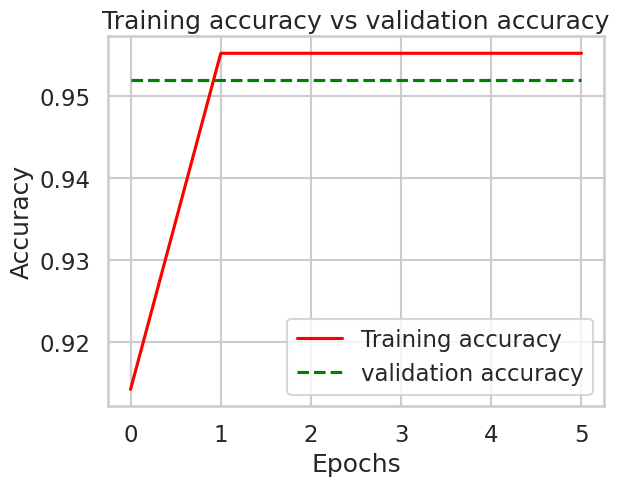

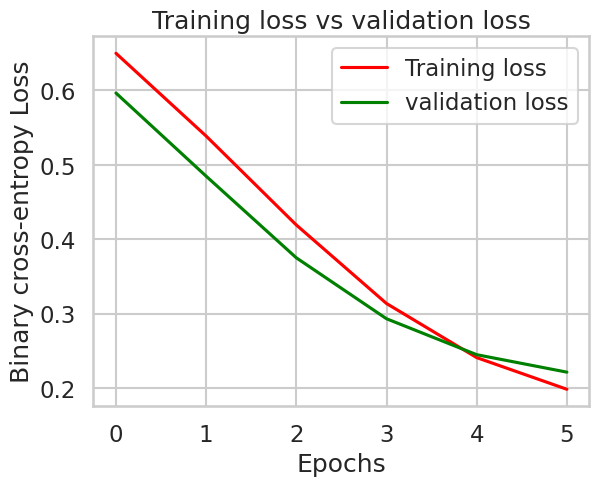

In [ ]:
score, acc = my_model.evaluate(X_test, y_test, batch_size=32)
print('Test accuracy:', acc)

sns.set_style("whitegrid")
custom_palette = ["red", "green"]
sns.set_palette(custom_palette)
sns.set_context('talk')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], linestyle='--')
plt.title('Training accuracy vs validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training accuracy', 'validation accuracy'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training loss vs validation loss')
plt.ylabel('Binary cross-entropy Loss')
plt.xlabel('Epochs')
plt.legend(['Training loss', 'validation loss'], loc='upper right')
plt.show()


In [ ]:
pred = my_model.predict(X_test)
pred = np.where(pred >= 0.47, 1, 0)



32/32 [==============================] - 1s 16ms/step


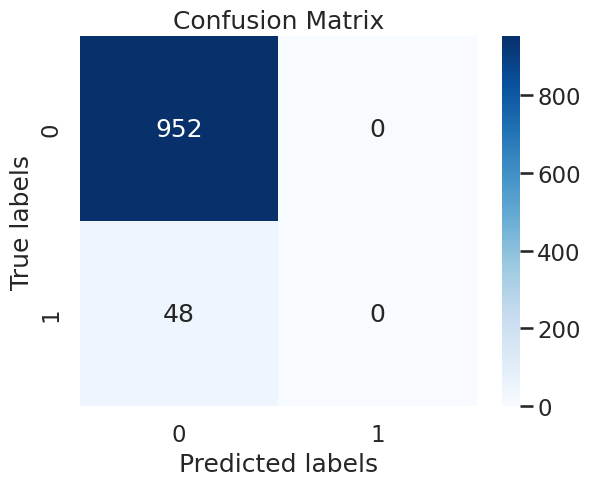

In [ ]:

from sklearn.metrics import confusion_matrix

pred_labels = np.argmax(pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test_labels, pred_labels)

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
label = ['non-toxic', 'toxic']
report = classification_report(y_test, pred, target_names=label)
print(report)

              precision    recall  f1-score   support

   non-toxic       0.95      1.00      0.98       952
       toxic       0.00      0.00      0.00        48

   micro avg       0.95      0.95      0.95      1000
   macro avg       0.48      0.50      0.49      1000
weighted avg       0.91      0.95      0.93      1000
 samples avg       0.95      0.95      0.95      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
